# Exploratory Data Analysis On IPL Data

## Author - NIKHIL KUMAR

## Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset and printing to see the contents

In [3]:
data=pd.read_csv("matches.csv")
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Checking the null values

In [4]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## visualizing the teams based on the number of wins

<AxesSubplot:>

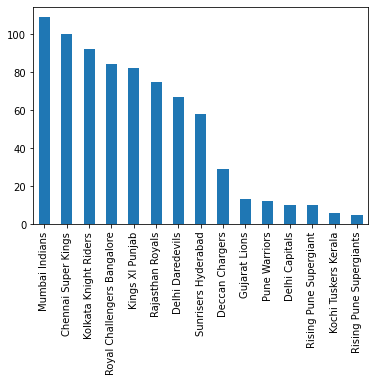

In [11]:
data['winner'].value_counts().plot.bar()

Here we see that Mumbai Indians is the most successful team with maximum no of matches won.

## Printing the no of wins for each team

In [18]:
data['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [5]:
print("Total matches played:",data['winner'].count()) # Total no of matches played in IPL

Total matches played: 752


Out of total 752 matches ,Mumbai Indians has won maximum 109 matches followed by Chennai Super kings winning 100 matches.

## No of wins per season for each team

In [31]:
win_per_season=data.groupby('season')['winner'].value_counts()
print(win_per_season)

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64


## Win probability based on toss win

In [28]:
c=0
for index, value in data.iterrows():
    if(value['toss_winner']==value['winner']):
        c+=1
print("Matches won by team winning toss:",c)   
print("Matches won by team losing toss:",752-c) 
print("win percentage of team winning toss:",c/752*100)

Matches won by team winning toss: 393
Matches won by team losing toss: 359
win percentage of team winning toss: 52.26063829787234


52.26% of the time teams winning the toss has won the match.

## No of matches played on different venues

<AxesSubplot:>

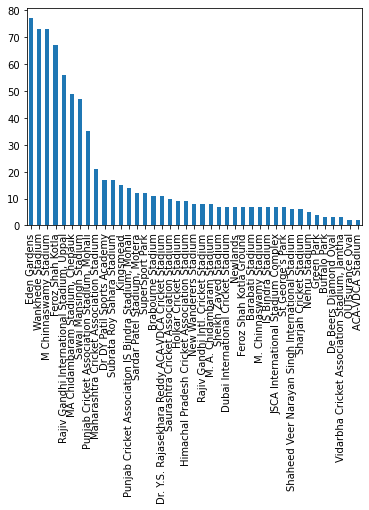

In [37]:
data.venue.value_counts()
data.venue.value_counts().plot.bar()

Eden Garden of Kolkata has hosted maximum no of matches.

## Toss decision to Bat or to to Field

<AxesSubplot:>

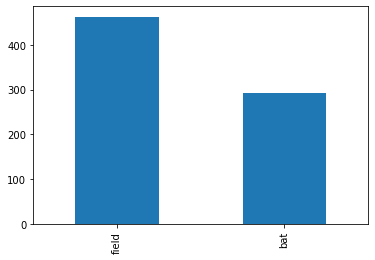

In [39]:
data['toss_decision'].value_counts().plot.bar()

In [5]:
data['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

463 matches have been won by teams chasing the target and 293 matches won by teams batting first.

## Printing toss and winner combination

In [4]:
temp1=data[['toss_winner','winner','toss_decision']]
temp1.head()

,toss_winner,winner,toss_decision
0,Royal Challengers Bangalore,Sunrisers Hyderabad,field
1,Rising Pune Supergiant,Rising Pune Supergiant,field
2,Kolkata Knight Riders,Kolkata Knight Riders,field
3,Kings XI Punjab,Kings XI Punjab,field
4,Royal Challengers Bangalore,Royal Challengers Bangalore,bat


## Importing Deliveries Dataset

In [41]:
deliveries=pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Printing the details about Deliveries dataset

In [42]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Highest run scorer

In [45]:
Highest_Runs = deliveries.groupby('batsman').sum().sort_values('batsman_runs',ascending=False)
Highest_Runs['batsman_runs']

batsman
V Kohli        5434
SK Raina       5415
RG Sharma      4914
DA Warner      4741
S Dhawan       4632
               ... 
IC Pandey         0
J Denly           0
P Raj             0
Sunny Gupta       0
L Ablish          0
Name: batsman_runs, Length: 516, dtype: int64

Virat Kohli(5434) is the total highest run scorer in the IPL followed by Suresh Raina(5415) and Rohit Sharma(4914)

# THANK YOU!!